In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [10]:
from tensorflow.keras.datasets import cifar10



In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()  #Load dataset
X_train.shape #Size of training dataset

(50000, 32, 32, 3)

In [ ]:
X_test.shape #Size of test dataset

(10000, 32, 32, 3)

In [15]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:5] #First 5 labels of training dataset

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
y_train = y_train.reshape(-1,) #Reshape labels to 1D array
y_train[:5] #First 5 labels of training dataset after reshaping

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [28]:
classes[1]

'automobile'

In [26]:
def plot_sample(index):
 plt.imshow(X_train[index]) #Display the image in the train dataset
 plt.xlabel(classes[y_train[index]]) #Display the label of the image

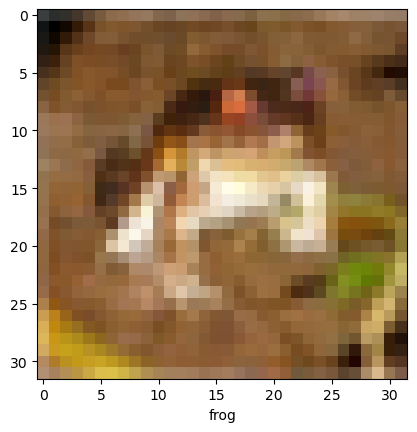

In [27]:
plot_sample(0) 

In [ ]:
X_train = X_train/255 #Normalisation
X_test = X_test/255

ANN for Image Classification


In [31]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #Input layer with image size 32x32 and 3 channels
    layers.Dense(3000, activation='relu'), #Hidden layer with 3000 neurons
    layers.Dense(1000, activation='relu'), #Hidden layer with 1000 neurons
    layers.Dense(10, activation='sigmoid') #Output layer with 10 neurons for 10 classes
])
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']) #Compile the model with Adam optimizer and sparse categorical crossentropy loss function

ann.fit(X_train, y_train, epochs=5) #Model training

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.3278 - loss: 1.8903
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.4013 - loss: 1.6705
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.4275 - loss: 1.5916
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.4484 - loss: 1.5429
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4647 - loss: 1.4992


In [32]:
ann.evaluate(X_test, y_test) #Model evaluation on test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4684 - loss: 1.5125


[1.5125254392623901, 0.4684000015258789]

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test) #Predict the labels for test dataset
y_pred_classes = [np.argmax(element) for element in y_pred] #Convert predictions to class labels
print("Classification Report: \n", classification_report(y_test, y_pred_classes)) #Print classification report

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.50      0.52      1000
           1       0.63      0.52      0.57      1000
           2       0.37      0.28      0.32      1000
           3       0.31      0.39      0.35      1000
           4       0.38      0.44      0.41      1000
           5       0.45      0.26      0.33      1000
           6       0.47      0.54      0.50      1000
           7       0.55      0.53      0.54      1000
           8       0.54      0.63      0.58      1000
           9       0.48      0.61      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



CNN for Image Classification


In [36]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), #First convolutional layer with 32 filters and kernel size 3x3
    layers.MaxPooling2D((2,2)), #First max pooling layer with pool size 2x2
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), #Second convolutional layer with 64 filters and kernel size 3x3
    layers.MaxPooling2D((2,2)), #Second max pooling layer with pool size 2x2

    #dense
    layers.Flatten(), 
    layers.Dense(128, activation='relu'), #Hidden layer with 3000 neurons
    layers.Dense(10, activation='softmax') #Output layer with 10 neurons for 10 classes
])


f:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']) #Compile the model with Adam optimizer and sparse categorical crossentropy loss function


In [38]:
cnn.fit(X_train, y_train, epochs=10) #Model training

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5010 - loss: 1.3890
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6367 - loss: 1.0437
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6858 - loss: 0.9022
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7221 - loss: 0.7978
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7517 - loss: 0.7114
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7790 - loss: 0.6336
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8049 - loss: 0.5579
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8271 - loss: 0.4922
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8477 - loss: 0.4318
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8683 - loss: 0.3742


In [39]:
cnn.evaluate(X_test, y_test) #Model evaluation on test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6899 - loss: 1.1120


[1.111983299255371, 0.6898999810218811]

In [40]:
y_test = y_test.reshape(-1,) #Reshape labels to 1D array
y_test[:5] #First 5 labels of test dataset after reshaping

array([3, 8, 8, 0, 6], dtype=uint8)

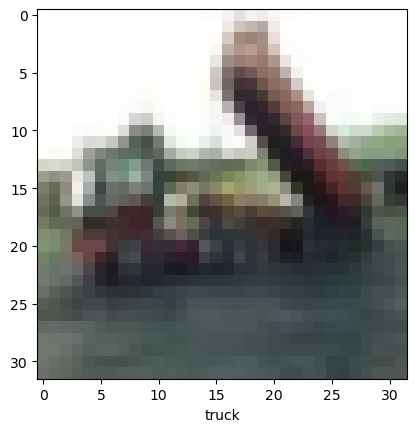

In [41]:
plot_sample(2)

In [42]:
y_pred = cnn.predict(X_test) #Predict the labels for test dataset
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[5.13728010e-04, 2.20762613e-05, 1.03844475e-04, 8.71197760e-01,
        1.74557534e-03, 1.12424985e-01, 1.31036453e-02, 4.79500188e-04,
        4.08578257e-04, 3.79066876e-07],
       [4.91797458e-04, 5.64090500e-04, 1.54249093e-07, 4.91145968e-09,
        4.50505293e-11, 9.96019933e-12, 2.79964329e-10, 4.43767939e-11,
        9.98320997e-01, 6.23067550e-04],
       [9.84160751e-02, 1.17012642e-01, 1.54089741e-02, 9.28737521e-02,
        2.37810407e-02, 6.33234205e-03, 1.18890044e-03, 6.60833577e-03,
        5.03622770e-01, 1.34755164e-01],
       [5.72683454e-01, 1.32457949e-02, 1.05784893e-01, 1.01923500e-03,
        9.62666124e-02, 4.80466815e-06, 3.85087469e-06, 1.71589691e-05,
        2.10974053e-01, 1.41868483e-07],
       [2.67661449e-09, 8.48699884e-08, 2.48236731e-02, 8.21009800e-02,
        1.31842002e-01, 2.37114588e-03, 7.58857906e-01, 3.93262809e-07,
        2.37715358e-06, 1.46738932e-06]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred] #Convert predictions to class labels

In [48]:
y_classes[:15]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9]

In [49]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

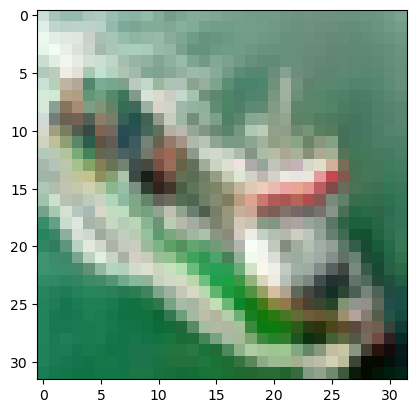

In [54]:
plt.imshow(X_test[15])

In [53]:
classes[y_test[15]]

'ship'

In [51]:
classes[y_classes[15]]

'ship'

In [55]:
print("Classification Report: \n", classification_report(y_test, y_classes)) #Print classification report

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.86      0.74      0.80      1000
           2       0.58      0.61      0.59      1000
           3       0.47      0.54      0.50      1000
           4       0.68      0.60      0.64      1000
           5       0.57      0.60      0.58      1000
           6       0.80      0.72      0.76      1000
           7       0.76      0.71      0.74      1000
           8       0.82      0.78      0.80      1000
           9       0.72      0.85      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

